![](https://github.com/AutoViML/deep_autoviml/raw/master/deep_4.jpg)

Source: https://github.com/AutoViML/deep_autoviml/

# Install deep_autoviml

!pip install deep_autoviml or
!pip install git+https://github.com/AutoViML/deep_autoviml.git

In [1]:
# !pip install deep_autoviml
!pip install git+https://github.com/AutoViML/deep_autoviml.git

  Cloning https://github.com/AutoViML/deep_autoviml.git to /tmp/pip-req-build-8n007uum
  Running command git clone -q https://github.com/AutoViML/deep_autoviml.git /tmp/pip-req-build-8n007uum
     |████████████████████████████████| 454.3 MB 13 kB/s 
     |████████████████████████████████| 14.5 MB 51.8 MB/s 
     |████████████████████████████████| 4.3 MB 29.0 MB/s 
     |████████████████████████████████| 96 kB 4.2 MB/s 
     |████████████████████████████████| 4.0 MB 29.0 MB/s 
     |████████████████████████████████| 4.0 MB 56.0 MB/s 
     |████████████████████████████████| 1.2 MB 29.5 MB/s 
     |████████████████████████████████| 462 kB 56.1 MB/s 
     |████████████████████████████████| 6.0 MB 55.1 MB/s 
     |████████████████████████████████| 4.9 MB 53.6 MB/s 
  Created wheel for deep-autoviml: filename=deep_autoviml-0.0.49-py3-none-any.whl size=221453 sha256=937a5b4f36ce58fe6ea1d598ce898816079eaaac510b54e78c962c5c86934570
  Stored in directory: /tmp/pip-ephem-wheel-cache-eg0t94jp/whee

![](https://github.com/AutoViML/deep_autoviml/raw/master/deep_1.jpg)

In [2]:
from deep_autoviml import deep_autoviml as deepauto
import numpy as np
import pandas as pd


Imported deep_auto_viml. version=0.0.49
from deep_autoviml import deep_autoviml as deepauto
-------------------
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type="fast",
		project_name="deep_autoviml", keras_options=keras_options,  
		model_options=model_options, save_model_flag=True, use_my_model='',
		model_use_case='', verbose=0)

predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)
                                


In [3]:
df = pd.read_csv('../input/vertebralcolumndataset/column_2C.csv')
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
df['class'] = df['class'].map({'Normal': 0, 'Abnormal': 1})
df.shape

(310, 7)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import accuracy_score
train ,test = train_test_split(df,test_size=0.70)

### Using XGB

In [6]:
from xgboost import XGBClassifier
X = train[['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope', 'pelvic_radius','degree_spondylolisthesis']]
Y = train['class']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

xgb = XGBClassifier(max_depth=10, learning_rate=0.01, n_estimators=100, gamma=0, 
                        min_child_weight=1, subsample=0.8, colsample_bytree=0.6, reg_alpha=0.005)
xgb.fit(X_train, y_train)
preds = xgb.predict(X_test)
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))

[21:39:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost's prediction accuracy is: 96.43


In [7]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = xgb.predict(test[['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope', 'pelvic_radius','degree_spondylolisthesis']])
# Creates a confusion matrix
cm = confusion_matrix(test[['class']], y_pred) 
cm

array([[ 39,  28],
       [ 16, 134]])

### Results on test data

In [8]:
print(classification_report(test[['class']], y_pred))

              precision    recall  f1-score   support

           0       0.71      0.58      0.64        67
           1       0.83      0.89      0.86       150

    accuracy                           0.80       217
   macro avg       0.77      0.74      0.75       217
weighted avg       0.79      0.80      0.79       217



# DEEPAUTOViML with fast2

In [9]:
modeltype =  "fast2" ## always try "fast1" first, then "fast2", then "auto".
##  If NLP, use "BERT" and if image, use "image" for keras_model_type. ###
model_options = {"tuner":"optuna", 'nlp_char_limit':15, 'cat_feat_cross_flag':False, 'max_trials': 4}
keras_options = {"patience":15,'class_weight':True, "early_stopping": True, "epochs": 100}

    Only CPU found on this device
Setting CPU strategy using 1 devices
Using following keras_options given as input:
    patience : 15
    epochs : 100
    class_weight : True
    early_stopping : True
Using following model_options given as input:
    cat_feat_cross_flag : False
    nlp_char_limit : 15
    max_trials : 4
    tuner : optuna
Max Trials is 10 for faster processing. Please increase max_trials if you want more accuracy...

#################################################################################
###########     L O A D I N G    D A T A    I N T O   TF.DATA.DATASET H E R E  #
#################################################################################
        
Alert! Modified column names to satisfy rules for column names in Tensorflow...
    Model type is Classification and Single_Label problem
    Classifying variables using data sample in pandas...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set.

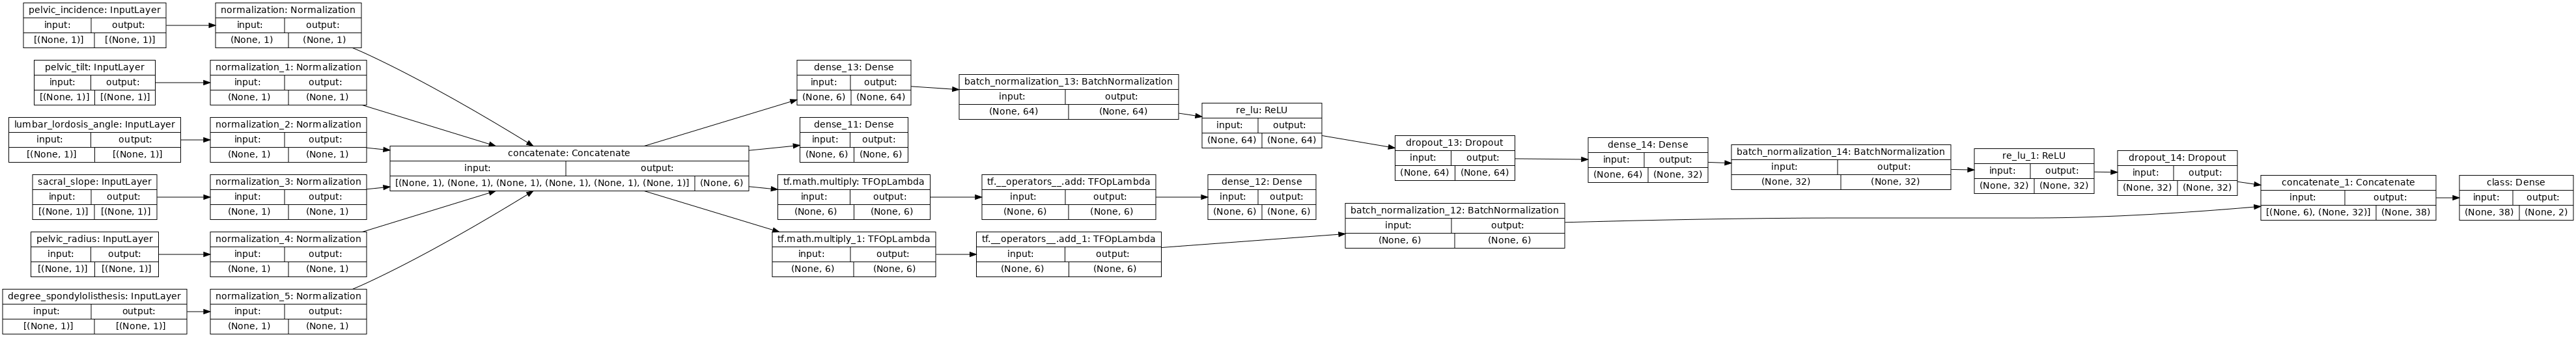

Model plot saved in file: deep_autoviml_VertebralColumnAnalysis_fast2_model_before.png

#################################################################################
###########     T R A I N I N G    K E R A S   M O D E L   H E R E      #########
#################################################################################
    
Training a fast2 model option...
    class_weights: {0: 1.4090909090909092, 1: 1.0}
    original datasize = 93, initial batchsize = 32
    recommended steps per epoch = 10
    recommended OneCycle steps = 300
    default initializer = lecun_normal, default activation = selu
    Recommended: Increase patience for "onecycle" scheduler
Tensorboard log directory can be found at: deep_autoviml/mylogs
    chosen keras LR scheduler = default
    val mode = max, val monitor = val_balanced_sparse_categorical_accuracy, patience = 15.0
    number of epochs = 100, steps per epoch = 10

Splitting train into 80+20 percent: train and validation data
    Splitting vali

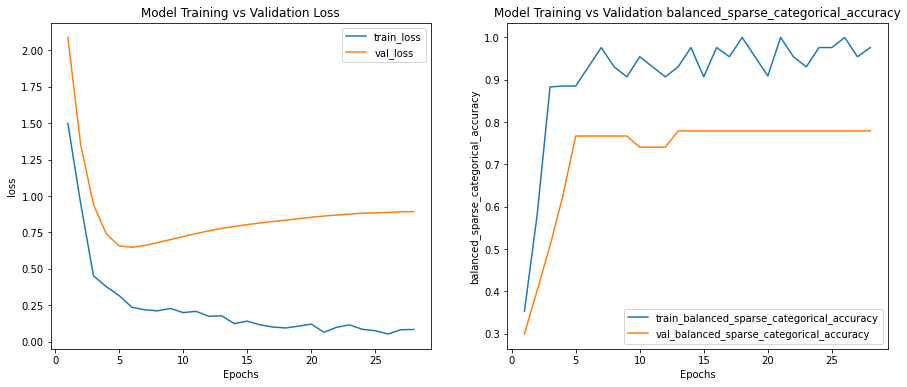


###########################################################
         Held-out test data set Results:
Single Label, Multi Class Model Metrics Report: class
#################################################################


    Accuracy          = 78.1%
    Balanced Accuracy = 77.9%
    Precision         = 83.3%
    Average Precision = 77.4%
    Recall            = 78.9%
    F1 Score          = 81.1%
    ROC AUC           = 80.6%
#####################################################

Training on full train dataset for 13 epochs. This will take time...
    completed. Time taken (in mins) = 0


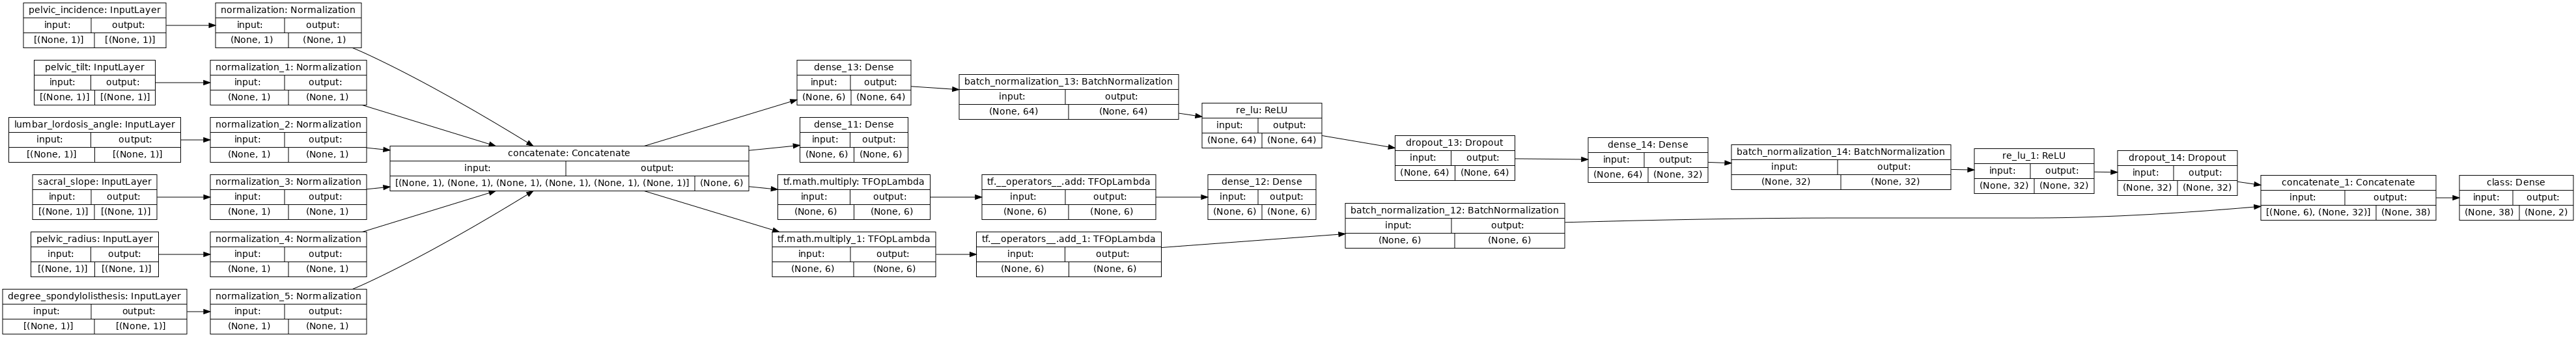

Model plot saved in file: deep_autoviml_VertebralColumnAnalysis_fast2_model_after.png


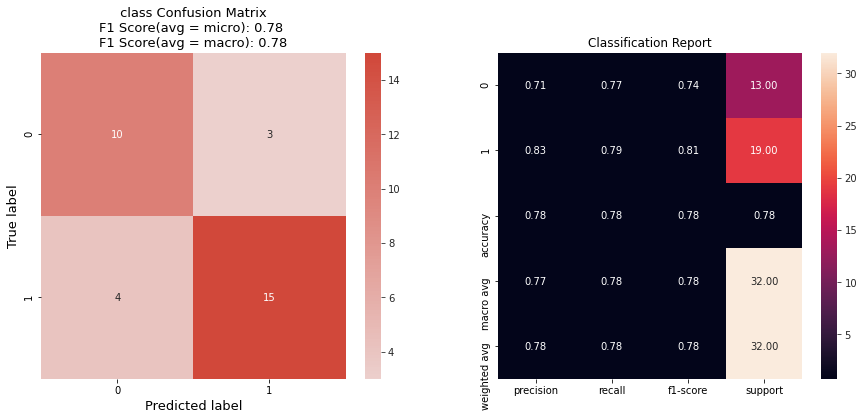

In [10]:
project_name = "VertebralColumnAnalysis"
target = 'class'
output = deepauto.fit(train, target, modeltype, project_name=project_name, keras_options=keras_options,
                 model_options=model_options, save_model_flag=False, use_my_model='', verbose=0)

In [11]:
model = output[0]
cat_vocab_dict = output[1]

In [12]:
y_preds = deepauto.predict(model, project_name, test_dataset=test, keras_model_type=modeltype, cat_vocab_dict=cat_vocab_dict)


Using <tensorflow.python.keras.engine.functional.Functional object at 0x7f6efc32f950> model provided as input...
Time taken to load saved model = 0 seconds
Loaded test data size: 217
Alert! Modified column names to satisfy rules for column names in Tensorflow...
    test data loaded successfully.
test data size =  217 , batch_size =  32
Boolean column successfully processed
    number of steps needed to predict: 7
Returning model predictions in form of a list...of length 2
Time taken in mins for predictions = 0


### Results on test data

In [13]:
from deep_autoviml.utilities.utilities import print_classification_model_stats, print_regression_model_stats
y_test = test[target].values
print_classification_model_stats(y_test, y_preds[1])

Balanced Accuracy = 79.47%
Confusion Matrix:
[[ 52  15]
 [ 28 122]]
              precision    recall  f1-score   support

           0       0.65      0.78      0.71        67
           1       0.89      0.81      0.85       150

    accuracy                           0.80       217
   macro avg       0.77      0.79      0.78       217
weighted avg       0.82      0.80      0.81       217

#####################################################################


Results with Deep AutoML is better.

# Watch YouTube Video for Demo of Deep_AutoViML

In [14]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

from IPython.display import HTML
HTML('<iframe width="1188" height="668" src="https://www.youtube.com/embed/IcpwNNNXsWE" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')
